In [201]:
# !pip install -U scikit-learn

In [202]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datos_2c2020_tp2.models.log.Logger as logger

In [203]:
train = pd.read_csv("../datasets/xgb-train.csv")
test = pd.read_csv("../datasets/xgb-test.csv")

# TP2 - XGBoost example

El objetivo es crear un primer modelo básico de XGBoost, sin feature engineering ni hyperparameters tunning, para poder tener un primer resultado local. Luego, realizar un primer submit en kaggle y en base a eso ir mejorando el modelo


Luego verifico que dropear filas que se overlapean con test implica
dejar de lado la mayoria de datos por lo cual no se tendraa en cuenta.
(djo el codigo de dropeo comentaado)

-----------------------------------------

# TRF division

Aqui, se divide entre TRF>0 y TRF>0

In [204]:
# train['trf_eq_0'] = np.where(train['TRF']==0, True, False)
# test['trf_eq_0'] = np.where(test['TRF']==0, True, False)

# Entrenamiento

In [205]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', 
              colsample_bytree = 0.3, learning_rate = 0.1,
              max_depth = 11, alpha = 20, n_estimators = 222)

In [206]:
target = "target"
features = list(train.columns)
features.remove(target)
features.remove("Opportunity_ID")
# features.remove("Month")
features.remove("late_delivery_blocknum")
features.remove("early_delivery_blocknum")
features.remove("Delivery_Year")
#features.remove("Year")
len(features)


114

In [207]:
X_train, y_train = train.loc[:,features],train.loc[:,target]
X_test_Opp = test.loc[:,"Opportunity_ID"]
X_test = test.loc[:,features]



In [208]:
print(X_train.shape)
print(X_test.shape)

(16947, 114)
(2551, 114)


In [209]:


xg_reg.fit(X_train,y_train)


XGBRegressor(alpha=20, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=11,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=222, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=20, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [210]:
preds = xg_reg.predict(X_test)




In [211]:
pred_df = pd.DataFrame(X_test_Opp)
pred_df["Target"] = preds
pred_df = pred_df.drop_duplicates("Opportunity_ID")
pred_df
pred_df.to_csv("../submits/xgb_preprocessed_dates.csv",index=False)

#

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

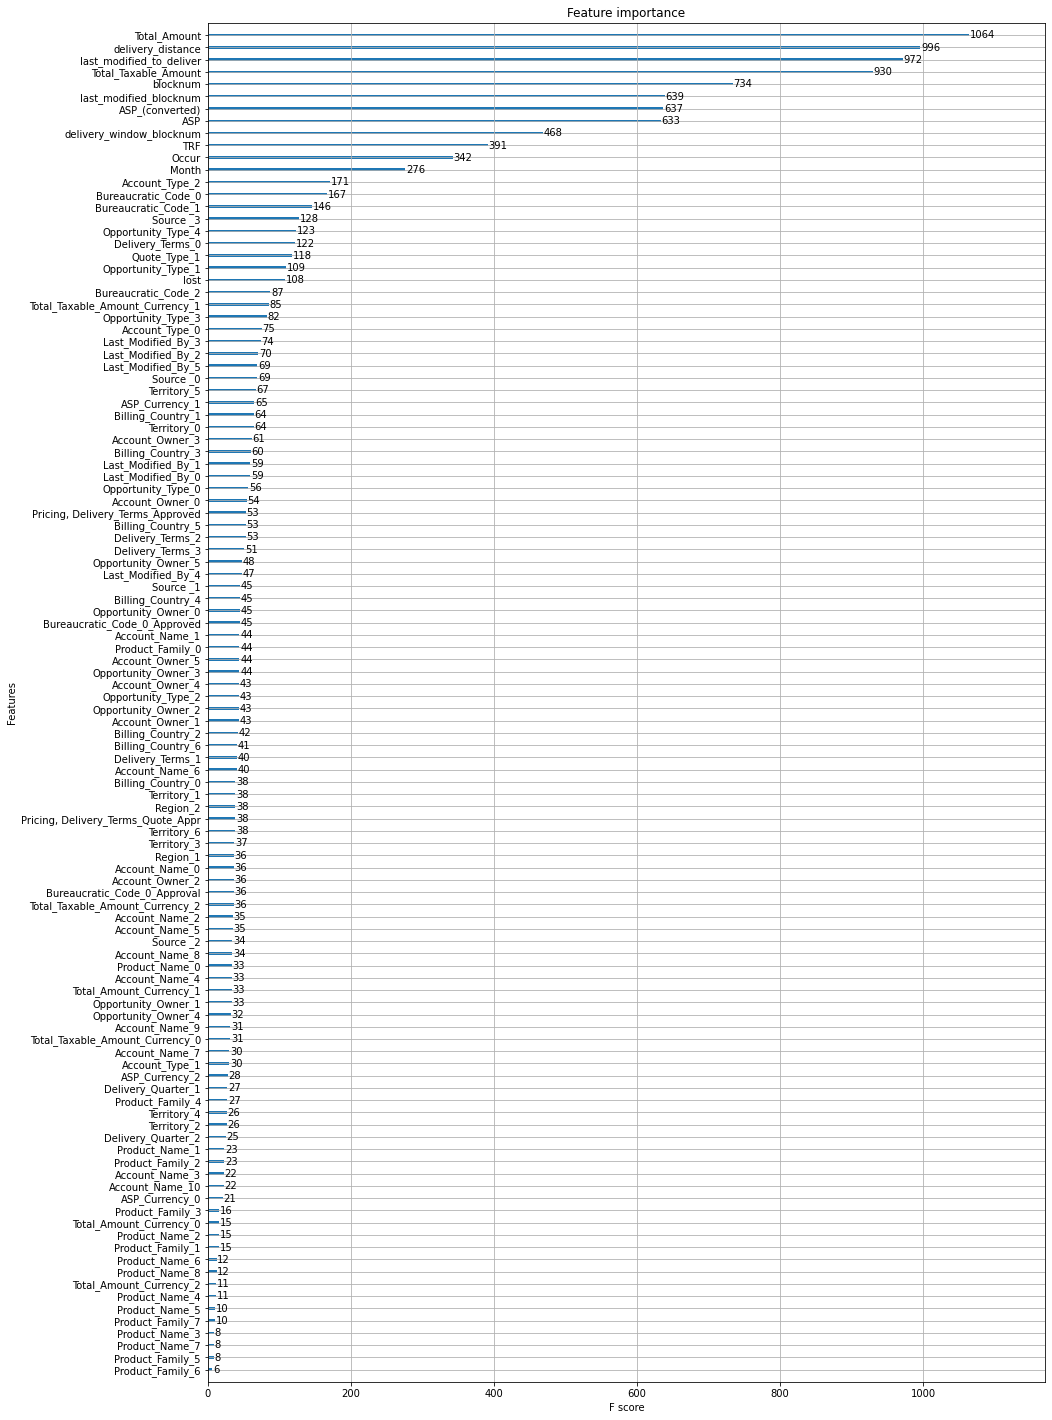

In [212]:
plt.rcParams['figure.figsize'] = [15, 25]
xgb.plot_importance(xg_reg)



In [213]:

data_dmatrix = xgb.DMatrix(data=X_train,label=y_train)

params = {"objective":"reg:squarederror",'colsample_bytree': 0.3,
          'learning_rate': 0.1, 'max_depth': 11, 'alpha': 20}



cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50, early_stopping_rounds=10,
                    metrics="rmse", as_pandas=True, seed=6546546)
cv_results.tail()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
45,0.295729,0.000487,0.310527,0.001946
46,0.294959,0.000567,0.309922,0.001996
47,0.294221,0.000445,0.309316,0.001828
48,0.293449,0.000626,0.308710,0.001951
49,0.292457,0.000535,0.307833,0.001730


In [214]:
cv_score = (cv_results["test-rmse-mean"]).tail(1)

print(cv_score)


49    0.307833
Name: test-rmse-mean, dtype: float64


In [215]:
logger.Logger.log_model("xgb", params, features, cv_score, notes="xgboost blocknum y rtf")

TypeError: log_model() got multiple values for argument 'notes'